# wrangle_act notebook
### analyze @dog_rates twitter 

**Module Block**

In [1]:
#import block for libraries required
import pandas as pd
import numpy as np
import requests
import tweepy
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Gather

In [2]:
# pulling in the image predictions:

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open("image-predictions.tsv", mode = 'wb') as file:
    file.write(response.content)

**This is a markdown cell but the below is the actual code used to download the file**

* api_key = 'Garbage to fill space'
* api_secret = 'No I am your father'
* token = 'So it\' s treason then?'
* toen_secret = 'my precious'

* auth = tweepy.OAuthHandler(api_key, api_secret)
* auth.set_access_token(token, token_secret)
* api=tweepy.API(auth, wait_on_rate_limit = True)


* with open('I:\\tweet_json.txt', 'a+', encoding = 'utf8') as file:
  **   for tweet_id in df1.tweet_id:
    ***    try:
     ****       temp = api.get_status(tweet_id)
      *****      json.dump(temp._json, file)
       *****     file.write('\n')
        **** except:
          *****  continue

## Assess

**Import first file, and analyze its contents.**

In [3]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [4]:
df1.shape

(2356, 17)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
df1.describe()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
sum(df1.duplicated())

0

### Issues in first file

#### Quality
* Large number of NaN's in multiple columns 
    * ['in_reply_to_status_id', 
    * 'in_reply_to_user_id', 
    * expanded_urls
* timestamps are not in datetime data type
* duplicate dog names may or may not be same dog
* Mislabled data types for four categoricals 'doggo', etc
* No data for categorical options doggo, floofer, pupper, puppo
* Maximum rating for a dog is 1776, unless this is george washington's dog, probably incorrect
* Denominators should all be 10, we have at least one larger than that

Note that some other columns had a large number of NaNs but were going to be dropped for final analysis anyway.

#### Tidiness

* 4 categories should be a single column, 'doggo' etc.




**Second file 'Image Predictions TSV file' block**

In [8]:
df2 = pd.read_csv('image-predictions.tsv', sep='\t')
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
df2[df2['p1_conf'] == 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df2.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [12]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Issues in second file

* One unit has p1_conf of 1.0 we need to validate that p2 & p3 are both 0
* tweet_id should be str not int
* img_num should be str not int

### analyzing the third file

In [13]:
df3 = pd.DataFrame(columns = ['tweet_id', 'retweet_count', 'favorite_count'])
with open ('tweet_json.txt') as file:
    for line in file:
        tweet = json.loads(line)
        t_id = tweet['id_str']
        r_ct = tweet['retweet_count']
        f_ct = tweet['favorite_count']
        df3 = df3.append(pd.DataFrame([[t_id,r_ct,f_ct]],columns = ['tweet_id', 'retweet_count', 'favorite_count']))
df3.reset_index(drop = True, inplace = True)
df3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7446,35283
1,892177421306343426,5531,30526
2,891815181378084864,3658,22969
3,891689557279858688,7618,38563
4,891327558926688256,8211,36856


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null object
favorite_count    2331 non-null object
dtypes: object(3)
memory usage: 54.7+ KB


In [15]:
df3.shape

(2331, 3)

In [16]:
type(df3.retweet_count[45])

int

## Clean

In [17]:
# create copies for cleaning process

df1_c = df1.copy()
df2_c = df2.copy()
df3_c = df3.copy()

* Find and locate items that are retweets of original tweet. Remove these rows. 
    * First change all NaN's in retweet_status to zeros
    * Locate all positions where the status is not zero
    * Remove those rows
    * Drop retweeted status column

In [18]:
# Since we're replacing NaN's in one column we might as well do this is all columns for df1

df1_c = df1_c.fillna(0)
df1_c.retweeted_status_id = df1_c.retweeted_status_id.astype('int')
df1_p = df1_c[df1_c['retweeted_status_id'] != 0] #create purge dataframe
df1_c = df1_c.drop(df1_p.index)
df1_c.drop(columns=['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

df1_c.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [19]:
# After identifying bad names in the name column, I've decided to fix that in this block where we fix NaNs
df1_c['name'].replace({'a':'None', 'an':'None', 'the':'None'}, inplace=True)

* Change timestamp column to datetime datatype.

In [20]:
# change times to datetime and confirm change
df1_c.timestamp = pd.to_datetime(df1_c.timestamp)
df1_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null float64
in_reply_to_user_id      2175 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2175 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


* Convert columns in df1 to correct datatypes 

In [21]:
#while I could have grouped these operations, in the event one needed to be reversed it is easier to keep them
# as seperate operations.
df1_c.tweet_id = df1_c.tweet_id.astype(str)
df1_c.in_reply_to_status_id = df1_c.in_reply_to_status_id.astype(int)
df1_c.in_reply_to_user_id = df1_c.in_reply_to_user_id.astype(int)
df1_c.in_reply_to_status_id = df1_c.in_reply_to_status_id.astype(str)
df1_c.in_reply_to_user_id = df1_c.in_reply_to_user_id.astype(str)

#including df2 here as well

df2_c.tweet_id = df2_c.tweet_id.astype(str)
df2_c.img_num = df2_c.img_num.astype(str)

df1_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2175 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 254.9+ KB


* convert doggos, etc. to categories and merge into single column

In [22]:
# counts of information and verification of proper data for the next few blocks of code
df1_c[['doggo','floofer','pupper','puppo']].apply(pd.Series.value_counts)

,doggo,floofer,pupper,puppo
None,2088.0,2165.0,1941.0,2150.0
doggo,87.0,NaN,NaN,NaN
floofer,NaN,10.0,NaN,NaN
pupper,NaN,NaN,234.0,NaN
puppo,NaN,NaN,NaN,25.0


In [23]:
df1_c[df1_c['floofer'] == 'floofer']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,0,0,2017-07-07 16:22:55,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
200,854010172552949760,0,0,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
582,800388270626521089,0,0,2016-11-20 17:20:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None
774,776218204058357768,0,0,2016-09-15 00:36:55,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,None,None
984,749317047558017024,0,0,2016-07-02 19:01:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,None,floofer,None,None
1022,746542875601690625,0,0,2016-06-25 03:17:46,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,https://vine.co/v/5uZYwqmuDeT,11,10,None,None,floofer,None,None
1091,737445876994609152,0,0,2016-05-31 00:49:32,"<a href=""http://twitter.com/download/iphone"" r...",Just wanted to share this super rare Rainbow F...,https://twitter.com/dog_rates/status/737445876...,13,10,None,None,floofer,None,None
1110,733822306246479872,0,0,2016-05-21 00:50:46,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,None,floofer,None,None
1534,689993469801164801,0,0,2016-01-21 02:10:37,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,https://vine.co/v/ienexVMZgi5,12,10,None,None,floofer,None,None
1614,685307451701334016,0,0,2016-01-08 03:50:03,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,None,floofer,None,None


In [24]:
df1_c[df1_c['pupper'] == 'pupper']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
29,886366144734445568,0,0,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None,pupper,None
49,882762694511734784,0,0,2017-07-06 00:46:41,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None,pupper,None
56,881536004380872706,0,0,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,None,None,None,pupper,None
82,876838120628539392,0,0,2017-06-19 16:24:33,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,https://twitter.com/dog_rates/status/876838120...,12,10,Ginger,None,None,pupper,None
92,874296783580663808,0,0,2017-06-12 16:06:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,https://twitter.com/dog_rates/status/874296783...,13,10,Jed,None,None,pupper,None
98,873213775632977920,0,0,2017-06-09 16:22:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
107,871762521631449091,0,0,2017-06-05 16:15:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Rover. As part of pupper protocol he h...,https://twitter.com/dog_rates/status/871762521...,12,10,Rover,None,None,pupper,None
135,866450705531457537,0,0,2017-05-22 00:28:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
199,854120357044912130,0,0,2017-04-17 23:52:16,"<a href=""http://twitter.com/download/iphone"" r...",Sometimes you guys remind me just how impactfu...,https://twitter.com/dog_rates/status/854120357...,14,10,None,None,None,pupper,None
220,850019790995546112,0,0,2017-04-06 16:18:05,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Boomer. He's a sandy pupper. Havi...,https://twitter.com/dog_rates/status/850019790...,12,10,Boomer,None,None,pupper,None


In [25]:
df1_c[df1_c['puppo'] == 'puppo']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
12,889665388333682689,0,0,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
14,889531135344209921,0,0,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo
71,878776093423087618,0,0,2017-06-25 00:45:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,None,None,None,puppo
94,874012996292530176,0,0,2017-06-11 21:18:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,None,None,None,puppo
129,867421006826221569,0,0,2017-05-24 16:44:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,None,None,None,puppo
168,859607811541651456,0,0,2017-05-03 03:17:27,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13,10,None,None,None,None,puppo
191,855851453814013952,0,0,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
395,825535076884762624,0,0,2017-01-29 02:44:34,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,14,10,None,None,None,None,puppo
398,825026590719483904,0,0,2017-01-27 17:04:02,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo
413,822872901745569793,0,0,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,None,None,None,puppo


In [26]:
pd.set_option("mode.chained_assignment", None) #suppress setting with copy warning. In general this is a bad idea.
# suppressing warnings is bad, but this warning in this case is expected as we are modifying the 
# existing dataframe in a way that is consistent with causing this warning, so for this case, it is suppressed.
# create new column and change its datatype
df1_c['dog_type'] = 'Null'
for i in df1_c.index:
    if df1_c.doggo[i] == 'doggo':
        df1_c['dog_type'][i] = 'doggo'
    elif df1_c.floofer[i] == 'floofer':
        df1_c['dog_type'][i] = 'floofer'
    elif df1_c.pupper[i] == 'pupper':
        df1_c['dog_type'][i] = 'pupper'
    elif df1_c.puppo[i] == 'puppo':
        df1_c['dog_type'][i] = 'puppo'
    else:
        df1_c['dog_type'][i] = 'None'
df1_c.dog_type = df1_c.dog_type.astype('category')
df1_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2175 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dog_type                 2175 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(11)
memory usage: 337.2+ KB


In [27]:
pd.set_option("mode.chained_assignment", "warn") #restore warning about set with copy
#drop all unneeded rows from df1_c
df1_c.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)
df1_c.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,0,0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [28]:
# checking to make sure all denominator values are 10
df1_c.rating_denominator.value_counts()

10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [29]:
#normalizing all ratings and denominators to x/10
df1_c['rating_numerator_norm'] = 10 * df1_c.rating_numerator/df1_c.rating_denominator
df1_c['rating_denominator_norm'] = 10 * df1_c.rating_denominator/df1_c.rating_denominator
df1_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                   2175 non-null object
in_reply_to_status_id      2175 non-null object
in_reply_to_user_id        2175 non-null object
timestamp                  2175 non-null datetime64[ns]
source                     2175 non-null object
text                       2175 non-null object
expanded_urls              2175 non-null object
rating_numerator           2175 non-null int64
rating_denominator         2175 non-null int64
name                       2175 non-null object
dog_type                   2175 non-null category
rating_numerator_norm      2175 non-null float64
rating_denominator_norm    2174 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 303.2+ KB


In [30]:
# drop denominator 0 row
df1_c.drop(index = 313, inplace = True)
# swap denominators and numerators from float to int
df1_c.rating_denominator_norm = df1_c['rating_denominator_norm'].astype(int)
df1_c.rating_numerator_norm = df1_c['rating_numerator_norm'].astype(int)
# drop old non-normalized columns
df1_c.drop(columns=['rating_numerator','rating_denominator'], inplace=True)

In [31]:
# check existing changes
df1_c.rating_numerator_norm.describe(),df1_c.rating_denominator_norm.describe(),df1_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                   2174 non-null object
in_reply_to_status_id      2174 non-null object
in_reply_to_user_id        2174 non-null object
timestamp                  2174 non-null datetime64[ns]
source                     2174 non-null object
text                       2174 non-null object
expanded_urls              2174 non-null object
name                       2174 non-null object
dog_type                   2174 non-null category
rating_numerator_norm      2174 non-null int64
rating_denominator_norm    2174 non-null int64
dtypes: category(1), datetime64[ns](1), int64(2), object(7)
memory usage: 189.1+ KB


(count    2174.000000
 mean       12.233211
 std        42.477296
 min         0.000000
 25%        10.000000
 50%        11.000000
 75%        12.000000
 max      1776.000000
 Name: rating_numerator_norm, dtype: float64, count    2174.0
 mean       10.0
 std         0.0
 min        10.0
 25%        10.0
 50%        10.0
 75%        10.0
 max        10.0
 Name: rating_denominator_norm, dtype: float64, None)

In [32]:
#change data type to correct type
df3_c.retweet_count = df3_c.retweet_count.astype(int)
df3_c.favorite_count = df3_c.favorite_count.astype(int)

In [33]:
#verify all datatypes are correct
df1_c.info(), df2_c.info(),df3_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                   2174 non-null object
in_reply_to_status_id      2174 non-null object
in_reply_to_user_id        2174 non-null object
timestamp                  2174 non-null datetime64[ns]
source                     2174 non-null object
text                       2174 non-null object
expanded_urls              2174 non-null object
name                       2174 non-null object
dog_type                   2174 non-null category
rating_numerator_norm      2174 non-null int64
rating_denominator_norm    2174 non-null int64
dtypes: category(1), datetime64[ns](1), int64(2), object(7)
memory usage: 189.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64


(None, None, None)

In [34]:
# split df3_c into 2 dataframe named df3_c_r and df3_c_f
df3_c_r = df3_c.drop(columns='favorite_count')
df3_c_f = df3_c.drop(columns='retweet_count')
# split df1_c into 2 daframes named df1_c and df1_doggo
df1_doggo = df1_c[['tweet_id','dog_type']]
df1_c.drop(columns=['dog_type'], inplace = True)
# split df1_c ratings off as we are treating this as an observation (even though it isn't).
#also we only copy df1_c.rating_numerator_norm as the denominators are now all 10 and have no relevance.
df1_rating = df1_c[['tweet_id','rating_numerator_norm']]
df1_c.drop(columns=['rating_numerator_norm','rating_denominator_norm'])
df3_c_r.info(), df3_c_f.info(), df1_c.info(), df1_doggo.info(), df1_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 2 columns):
tweet_id         2331 non-null object
retweet_count    2331 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 2 columns):
tweet_id          2331 non-null object
favorite_count    2331 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                   2174 non-null object
in_reply_to_status_id      2174 non-null object
in_reply_to_user_id        2174 non-null object
timestamp                  2174 non-null datetime64[ns]
source                     2174 non-null object
text                       2174 non-null object
expanded_urls              2174 non-null object
name                       2174 non-null object
rating_numerator_norm      2174 non

(None, None, None, None, None)

In [35]:
# get all datasets the same size for operations between them
#first determine which order provides the smallest dataset.
x = sum(df1_c.tweet_id.isin(df2_c.tweet_id))
y = sum(df1_c.tweet_id.isin(df3_c.tweet_id))
z = sum(df2_c.tweet_id.isin(df3_c.tweet_id))

In [36]:
# first cut the new df1_c via df2, then via df3.
df1_c = df1_c[df1_c['tweet_id'].isin(df2_c['tweet_id'])]
df1_c = df1_c[df1_c['tweet_id'].isin(df3_c['tweet_id'])]
df2_c = df2_c[df2_c['tweet_id'].isin(df3_c['tweet_id'])]
df2_c = df2_c[df2_c['tweet_id'].isin(df1_c['tweet_id'])]
df3_c_r = df3_c_r[df3_c_r['tweet_id'].isin(df1_c['tweet_id'])]
df3_c_f = df3_c_f[df3_c_f['tweet_id'].isin(df1_c['tweet_id'])]


In [37]:
# make sure all dataframes are the same size:
df1_c.shape,df2_c.shape,df3_c_r.shape,df3_c_f.shape

((1987, 10), (1987, 12), (1987, 2), (1987, 2))

In [38]:
#make sure the datat they contain all has the same tweet ids
df1_c.tweet_id.isin(df2_c.tweet_id).value_counts(),df1_c.tweet_id.isin(df3_c_f.tweet_id).value_counts()

(True    1987
 Name: tweet_id, dtype: int64, True    1987
 Name: tweet_id, dtype: int64)

In [39]:
df1_c.to_csv('twitter_archive_master.csv', encoding='utf-8')
df1_doggo.to_csv('twitter_archive_doggo.csv', encoding='utf-8')
df1_rating.to_csv('twitter_archive_rating.csv', encoding='utf-8')
df2_c.to_csv('image_predictions_master.csv', encoding='utf-8')
df3_c_r.to_csv('recount_master.csv', encoding='utf-8')
df3_c_f.to_csv('favorite_master.csv', encoding='utf-8')

## Analyze

### Impact of time on retweet numbers

In [40]:
# Analysis for tweet time impact on retweet numbers creation of dfa1 for analysis

dfa1 = df1_c.merge(df3_c_r, how = 'inner', on = 'tweet_id')
dfa1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 11 columns):
tweet_id                   1987 non-null object
in_reply_to_status_id      1987 non-null object
in_reply_to_user_id        1987 non-null object
timestamp                  1987 non-null datetime64[ns]
source                     1987 non-null object
text                       1987 non-null object
expanded_urls              1987 non-null object
name                       1987 non-null object
rating_numerator_norm      1987 non-null int64
rating_denominator_norm    1987 non-null int64
retweet_count              1987 non-null int64
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 186.3+ KB


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  """


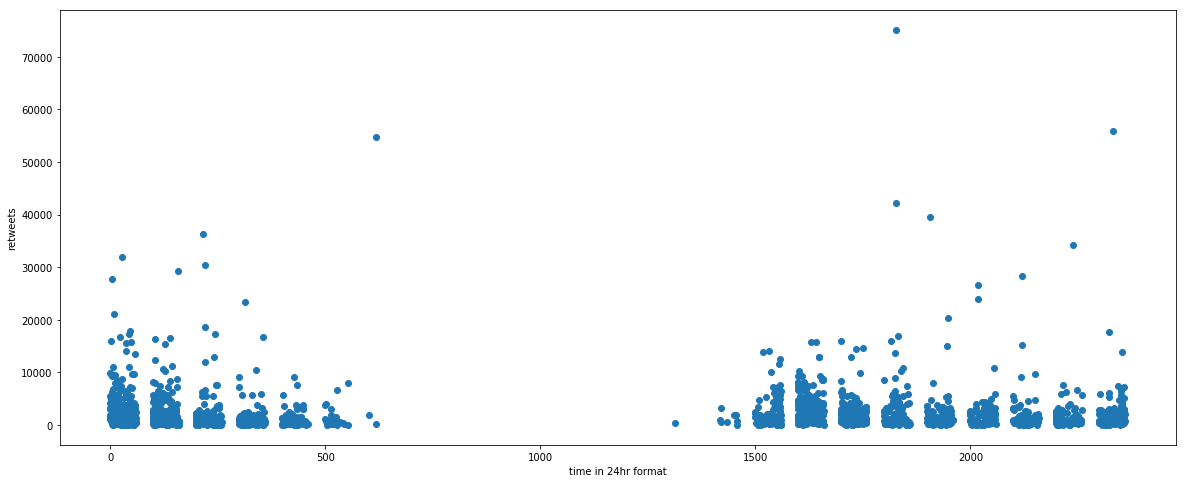

In [41]:
# strip the times out of the datetime data above
times = dfa1.timestamp.dt.strftime('%H:%M')
# convert to ints 
for i in range(len(times)):
    times[i] = times[i].replace(':','')
times = times.astype(int)
# chart this data
x = np.arange(len(times))
plt.figure(figsize = (20,8))
plt.plot(times, dfa1.retweet_count, 'o')
plt.xlabel('time in 24hr format')
plt.ylabel('retweets')
plt.show()

### Impact of having a name on retweet numbers

In [42]:
# Check if having a name has an impact create dataframe dfa2
pd.set_option("mode.chained_assignment", None)
dfa2 = df1_c[['tweet_id','name']].merge(df3_c_r, how = 'inner', on = 'tweet_id')
# We're not intersted in seeing if a specific name is better, but rather if names in general are
# in order to facilitate this, we're going to shift ALL names to 1, and all "None" to 0 
dfa2.name = dfa2.name.apply(lambda dfa2 : 0 if dfa2 == 'None' else 1)
dfa2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 3 columns):
tweet_id         1987 non-null object
name             1987 non-null int64
retweet_count    1987 non-null int64
dtypes: int64(2), object(1)
memory usage: 62.1+ KB


In [43]:
#difference in means for analysis
dfa2_dm = dfa2[dfa2.name == 1].retweet_count.mean() - dfa2[dfa2.name == 0].retweet_count.mean() 

In [44]:
# Analysisto determine if the difference in retweet counts is significant or not.
named, notnamed, diffs = [] , [], []
for _ in range(10000):
    bootsamp = dfa2.sample(dfa2.shape[0], replace = True)
    noname_mean = bootsamp[bootsamp['name'] == 0]['retweet_count'].mean()
    name_mean = bootsamp[bootsamp['name'] == 1]['retweet_count'].mean()
    # append the info 
    notnamed.append(noname_mean)
    named.append(name_mean)
    diffs.append(name_mean - noname_mean)   
#split the two dataframes up to allow for independent random samples

In [45]:
#generate stds
std_name = np.std(named)
std_noname = np.std(notnamed)
std_dif = np.std(diffs)

std_name, std_noname, std_dif

(94.744259851763488, 218.32240472113128, 236.12428365149071)

Text(0.5,0,'retweet counts')

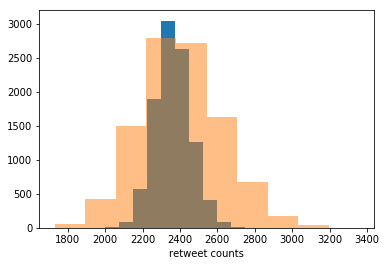

In [46]:
#historgam plot of the variable 'name' for named (blue) and unnamed dogs (orange)
plt.hist(named)
plt.hist(notnamed, alpha = .5)
plt.xlabel('retweet counts')

In [47]:
#generate a null sample based on the differences in tweets
null_vals = np.random.normal(0, np.std(diffs), 10000)

Text(0.5,0,'retweet count differences')

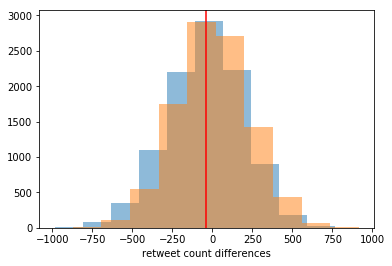

In [48]:
# histogram for the null and actual variation means.
plt.hist(diffs, alpha = .5)
plt.hist(null_vals, alpha = .5)
plt.axvline(dfa2_dm, color='red')
plt.xlabel('retweet count differences')

In [49]:
#calculate the p_value for if our mean is > .05
p_dfa2 = (null_vals > dfa2_dm).mean()
p_dfa2

0.57889999999999997

### Impact of dog 'type' on retweet numbers

In [50]:
#checking the impact of dog type on retweet counts create dfa3 dataframe
dfa3 = df1_doggo.merge(df3_c_r,how = 'inner', on = 'tweet_id')
dfa3.head()

,tweet_id,dog_type,retweet_count
0,892420643555336193,None,7446
1,892177421306343426,None,5531
2,891815181378084864,None,3658
3,891689557279858688,None,7618
4,891327558926688256,None,8211


In [51]:
# get dummies for further analysis using this set of data and sm.OLS
dfa3[['None', 'doggo', 'floofer', 'pupper', 'puppo']] = pd.get_dummies(dfa3.dog_type)
dfa3.drop(columns=['dog_type'], inplace=True)
dfa3.head()

,tweet_id,retweet_count,None,doggo,floofer,pupper,puppo
0,892420643555336193,7446,1,0,0,0,0
1,892177421306343426,5531,1,0,0,0,0
2,891815181378084864,3658,1,0,0,0,0
3,891689557279858688,7618,1,0,0,0,0
4,891327558926688256,8211,1,0,0,0,0


In [52]:
#add intercept for calculations
dfa3['intercept'] = 1
dfa3 = dfa3[~dfa3.retweet_count.isna()]
dfa3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 8 columns):
tweet_id         1987 non-null object
retweet_count    1987 non-null int64
None             1987 non-null uint8
doggo            1987 non-null uint8
floofer          1987 non-null uint8
pupper           1987 non-null uint8
puppo            1987 non-null uint8
intercept        1987 non-null int64
dtypes: int64(2), object(1), uint8(5)
memory usage: 71.8+ KB


In [53]:
# OLS regression on data
lm_dfa3 = sm.OLS(dfa3.retweet_count, dfa3[['intercept','doggo','floofer','pupper','puppo']])
results = lm_dfa3.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.035     
Dependent Variable: retweet_count    AIC:                38775.3633
Date:               2020-12-28 20:55 BIC:                38803.3352
No. Observations:   1987             Log-Likelihood:     -19383.   
Df Model:           4                F-statistic:        19.19     
Df Residuals:       1982             Prob (F-statistic): 1.69e-15  
R-squared:          0.037            Scale:              1.7438e+07
-------------------------------------------------------------------
              Coef.    Std.Err.    t    P>|t|    [0.025     0.975] 
-------------------------------------------------------------------
intercept   2206.0922  101.8192 21.6668 0.0000  2006.4083 2405.7760
doggo       3885.4558  499.2370  7.7828 0.0000  2906.3714 4864.5401
floofer     1998.3364 1581.5954  1.2635 0.2066 -1103.4278 5100.1006
pupper      -182.4468  310.2682 -0.5880 0.5566  -790.9329  426.0392
puppo       3426.3624  896.0929  3.8237 0.0001  1668.9793 5183.7454
-------------------------------------------------------------------
Omnibus:            2548.699      Durbin-Watson:         1.737     
Prob(Omnibus):      0.000         Jarque-Bera (JB):      485709.201
Skew:               6.886         Prob(JB):              0.000     
Kurtosis:           78.346        Condition No.:         17        
===================================================================

"""

### Rating impact on retweets

In [54]:
# Create dfa4 for impact of ratings vs retweets
dfa4 = df1_rating.merge(df3_c_r, how='inner', on='tweet_id')
dfa4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 3 columns):
tweet_id                 1987 non-null object
rating_numerator_norm    1987 non-null int64
retweet_count            1987 non-null int64
dtypes: int64(2), object(1)
memory usage: 62.1+ KB


In [55]:
# check data values for work
dfa4.describe()

,rating_numerator_norm,retweet_count
count,1987.000000,1987.000000
mean,11.689985,2375.176145
std,40.742214,4251.618249
min,0.000000,11.000000
25%,10.000000,530.500000
50%,11.000000,1148.000000
75%,12.000000,2707.000000
max,1776.000000,75154.000000


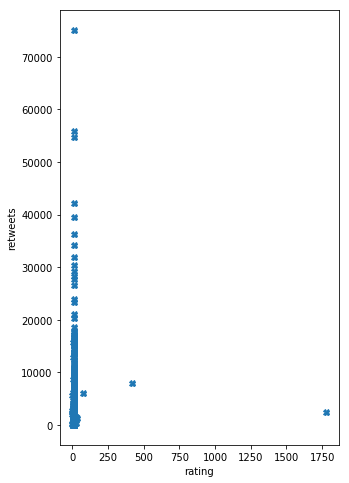

In [56]:
# plot for visual analysis
plt.figure(figsize = (5,8))
plt.plot(dfa4.rating_numerator_norm, dfa4.retweet_count, 'X')
plt.xlabel('rating')
plt.ylabel('retweets')
plt.show()

### tweet time vs favorite

In [57]:
# create dfa5 and check info on columns
dfa5 = df1_c.merge(df3_c_f, how = 'inner', on = 'tweet_id')
dfa5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 11 columns):
tweet_id                   1987 non-null object
in_reply_to_status_id      1987 non-null object
in_reply_to_user_id        1987 non-null object
timestamp                  1987 non-null datetime64[ns]
source                     1987 non-null object
text                       1987 non-null object
expanded_urls              1987 non-null object
name                       1987 non-null object
rating_numerator_norm      1987 non-null int64
rating_denominator_norm    1987 non-null int64
favorite_count             1987 non-null int64
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 186.3+ KB


Text(0,0.5,'favorites')

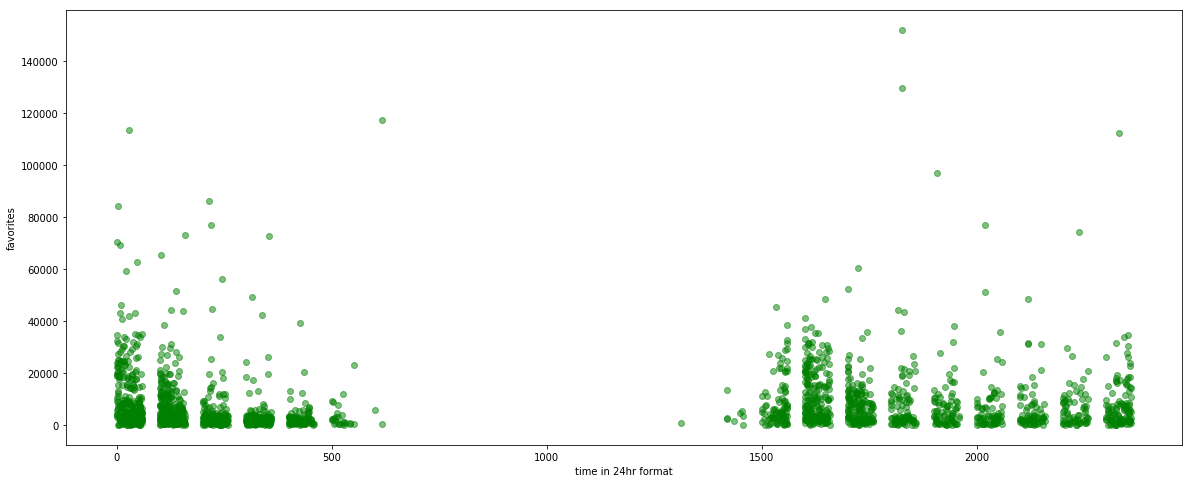

In [58]:
# plot data for analysis
plt.figure(figsize = (20,8))
plt.plot(times, dfa5.favorite_count,'o', color='green', alpha = .5)
plt.xlabel('time in 24hr format')
plt.ylabel('favorites')

### having a name vs. favorite

In [59]:
# Check if having a name has an impact create dataframe dfa6
pd.set_option("mode.chained_assignment", None)
dfa6 = df1_c[['tweet_id','name']].merge(df3_c_f, how = 'inner', on = 'tweet_id')
# We're not intersted in seeing if a specific name is better, but rather if names in general are
# in order to facilitate this, we're going to shift ALL names to 1, and all "None" to 0 
dfa6.name = dfa6.name.apply(lambda dfa6 : 0 if dfa6 == 'None' else 1)
dfa6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 3 columns):
tweet_id          1987 non-null object
name              1987 non-null int64
favorite_count    1987 non-null int64
dtypes: int64(2), object(1)
memory usage: 62.1+ KB


In [60]:
#difference in means for analysis
dfa6_dm = dfa6[dfa6.name == 1].favorite_count.mean() - dfa6[dfa6.name == 0].favorite_count.mean() 

In [61]:
# Analysisto determine if the difference in retweet counts is significant or not.
named, notnamed, diffs = [] , [], []
for _ in range(10000):
    bootsamp = dfa6.sample(dfa6.shape[0], replace = True)
    noname_mean = bootsamp[bootsamp['name'] == 0]['favorite_count'].mean()
    name_mean = bootsamp[bootsamp['name'] == 1]['favorite_count'].mean()
    # append the info 
    notnamed.append(noname_mean)
    named.append(name_mean)
    diffs.append(name_mean - noname_mean)   
#split the two dataframes up to allow for independent random samples

In [62]:
#generate stds
std_name = np.std(named)
std_noname = np.std(notnamed)
std_dif = np.std(diffs)

std_name, std_noname, std_dif

(298.17403767192224, 544.89083452001046, 619.48712937756761)

Text(0.5,0,'favorite counts')

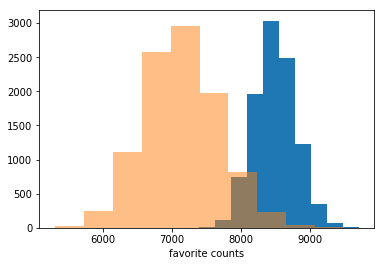

In [63]:
#historgam plot of the variable 'name' for named (blue) and unnamed dogs (orange)
plt.hist(named)
plt.hist(notnamed, alpha = .5)
plt.xlabel('favorite counts')

In [64]:
#generate a null sample based on the differences in tweets
null_vals = np.random.normal(0, np.std(diffs), 10000)

Text(0.5,0,'favorite count differences')

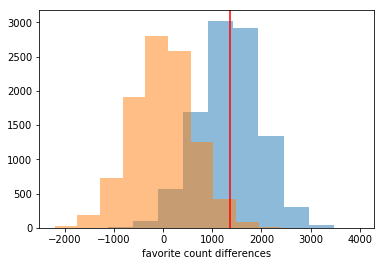

In [65]:
# histogram for the null and actual variation means.
plt.hist(diffs, alpha = .5)
plt.hist(null_vals, alpha = .5)
plt.axvline(dfa6_dm, color='red')
plt.xlabel('favorite count differences')

In [66]:
#calculate the p_value for if our mean is > .05
p_dfa6 = (null_vals > dfa6_dm).mean()
p_dfa6

0.014500000000000001

### Dog type vs favorites

In [67]:
#checking the impact of dog type on retweet counts create dfa3 dataframe
dfa7 = df1_doggo.merge(df3_c_f,how = 'inner', on = 'tweet_id')
dfa7.head()

,tweet_id,dog_type,favorite_count
0,892420643555336193,None,35283
1,892177421306343426,None,30526
2,891815181378084864,None,22969
3,891689557279858688,None,38563
4,891327558926688256,None,36856


In [68]:
# check datatypes
dfa7[['None', 'doggo', 'floofer', 'pupper', 'puppo']] = pd.get_dummies(dfa7.dog_type)
dfa7.drop(columns=['dog_type'], inplace=True)
dfa7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 7 columns):
tweet_id          1987 non-null object
favorite_count    1987 non-null int64
None              1987 non-null uint8
doggo             1987 non-null uint8
floofer           1987 non-null uint8
pupper            1987 non-null uint8
puppo             1987 non-null uint8
dtypes: int64(1), object(1), uint8(5)
memory usage: 56.3+ KB


In [69]:
#add intercept for calculations
dfa7['intercept'] = 1
dfa7 = dfa7[~dfa7.favorite_count.isna()]
dfa7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 8 columns):
tweet_id          1987 non-null object
favorite_count    1987 non-null int64
None              1987 non-null uint8
doggo             1987 non-null uint8
floofer           1987 non-null uint8
pupper            1987 non-null uint8
puppo             1987 non-null uint8
intercept         1987 non-null int64
dtypes: int64(2), object(1), uint8(5)
memory usage: 71.8+ KB


In [70]:
# OLS on dfa7 
lm_dfa7 = sm.OLS(dfa7.favorite_count, dfa7[['intercept','doggo','floofer','pupper','puppo']])
results = lm_dfa7.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.039     
Dependent Variable: favorite_count   AIC:                42853.4420
Date:               2020-12-28 20:55 BIC:                42881.4139
No. Observations:   1987             Log-Likelihood:     -21422.   
Df Model:           4                F-statistic:        21.09     
Df Residuals:       1982             Prob (F-statistic): 4.77e-17  
R-squared:          0.041            Scale:              1.3578e+08
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
intercept  7650.8306  284.1176 26.9284 0.0000  7093.6299  8208.0312
doggo     10350.1420 1393.0777  7.4297 0.0000  7618.0915 13082.1926
floofer    4096.4552 4413.3057  0.9282 0.3534 -4558.7507 12751.6610
pupper    -1151.9488  865.7767 -1.3305 0.1835 -2849.8767   545.9791
puppo     12782.5331 2500.4701  5.1121 0.0000  7878.7071 17686.3590
-------------------------------------------------------------------
Omnibus:             1816.736      Durbin-Watson:         1.263    
Prob(Omnibus):       0.000         Jarque-Bera (JB):      77144.171
Skew:                4.251         Prob(JB):              0.000    
Kurtosis:            32.317        Condition No.:         17       
===================================================================

"""

### rating vs favorite

In [71]:
# Create dfa4 for impact of ratings vs retweets
dfa8 = df1_rating.merge(df3_c_f, how='inner', on='tweet_id')
dfa8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 3 columns):
tweet_id                 1987 non-null object
rating_numerator_norm    1987 non-null int64
favorite_count           1987 non-null int64
dtypes: int64(2), object(1)
memory usage: 62.1+ KB


In [72]:
# check data 
dfa8.describe()

,rating_numerator_norm,favorite_count
count,1987.000000,1987.000000
mean,11.689985,8069.353800
std,40.742214,11885.685515
min,0.000000,69.000000
25%,10.000000,1726.500000
50%,11.000000,3647.000000
75%,12.000000,10029.000000
max,1776.000000,152066.000000


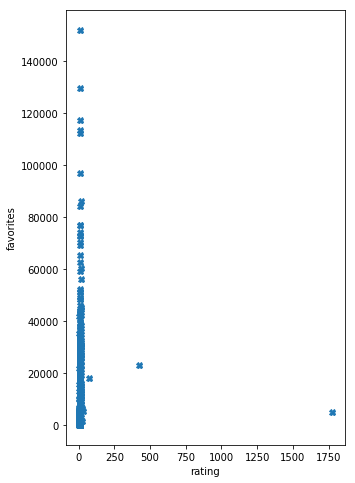

In [73]:
# plot data for visual analysis
plt.figure(figsize = (5,8))
plt.plot(dfa8.rating_numerator_norm, dfa8.favorite_count, 'X')
plt.xlabel('rating')
plt.ylabel('favorites')
plt.show()

### are retweets and favorites linked

In [74]:
# df3_c already includes both needed columns, though it is technically not a "Clean" dataframe.
dfa9 = df3_c.copy()
dfa9.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7446,35283
1,892177421306343426,5531,30526
2,891815181378084864,3658,22969
3,891689557279858688,7618,38563
4,891327558926688256,8211,36856


In [75]:
#add an intercept
dfa9['intercept'] = 1

In [76]:
# regression on favorites and retweets to confirm link
lm9 = sm.OLS(dfa9.favorite_count, dfa9[['intercept','retweet_count']])
results9 = lm9.fit()
results9.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.642     
Dependent Variable: favorite_count   AIC:                47791.3011
Date:               2020-12-28 20:55 BIC:                47802.8092
No. Observations:   2331             Log-Likelihood:     -23894.   
Df Model:           1                F-statistic:        4185.     
Df Residuals:       2329             Prob (F-statistic): 0.00      
R-squared:          0.642            Scale:              4.6911e+07
-------------------------------------------------------------------
                Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
intercept     1948.7391 164.7935 11.8253 0.0000 1625.5819 2271.8963
retweet_count    2.0745   0.0321 64.6952 0.0000    2.0116    2.1374
-------------------------------------------------------------------
Omnibus:             1079.154      Durbin-Watson:         1.515    
Prob(Omnibus):       0.000         Jarque-Bera (JB):      39960.273
Skew:                -1.512        Prob(JB):              0.000    
Kurtosis:            23.057        Condition No.:         5970     
===================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

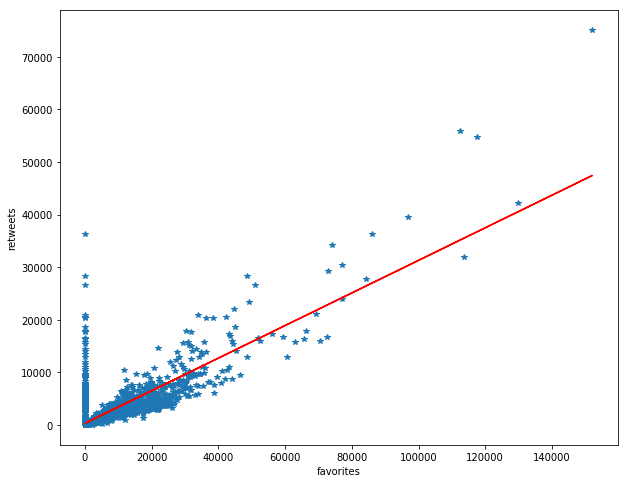

In [77]:
# create plot for favorite  (x) and retweets( y )
plt.figure(figsize = (10,8))
plt.plot(dfa9.favorite_count, dfa9.retweet_count, '*')
plt.xlabel('favorites')
plt.ylabel('retweets')
t_m = np.polyfit(dfa9.favorite_count, dfa9.retweet_count, 1)
t_p = np.poly1d(t_m)
plt.plot(dfa9.favorite_count,t_p(dfa9.favorite_count), "r-")
plt.show()

### Additional Graphs for use in report:

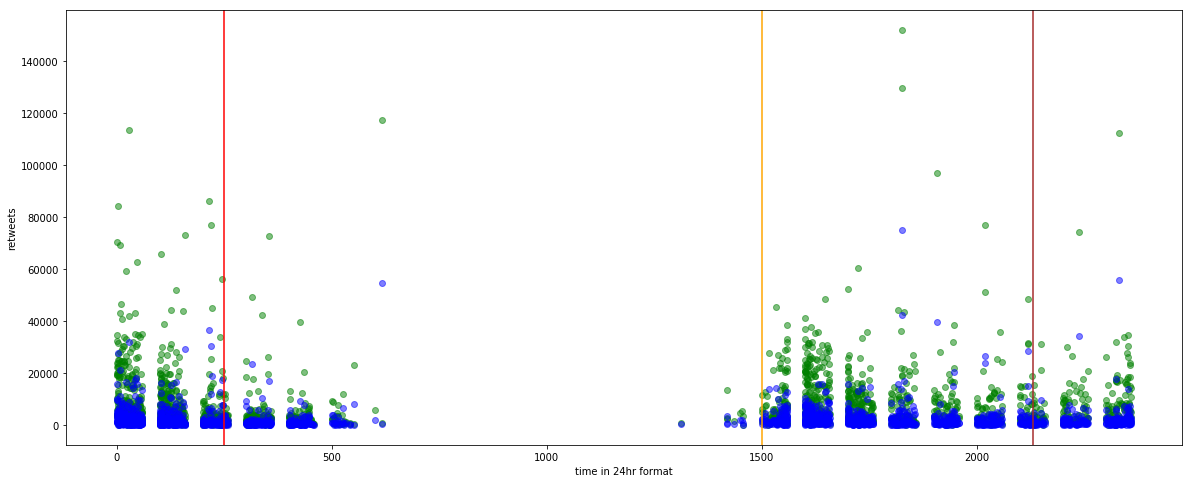

In [78]:
# replot of two dataframs dfa1, dfa5 to create comparison chart for report
plt.figure(figsize = (20,8))
plt.plot(times, dfa5.favorite_count,'o', color='green', alpha = .5)
plt.xlabel('time in 24hr format')
plt.ylabel('favorites')
plt.plot(times, dfa1.retweet_count, 'o', color='blue', alpha = .5)
plt.xlabel('time in 24hr format')
plt.ylabel('retweets')
plt.axvline(250, color='red')
plt.axvline(1500, color='orange')
plt.axvline(2130, color = 'brown')
plt.show()